In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_products = pd.read_csv('../../data/raw/products_detail.csv')
df_products.head()

,p_id,p_name,p_id_shop,p_shop_name,p_brand,p_categories,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,38510.0,JoyMall LocknLock Chính Hãng,LocknLock,Bình giữ nhiệt,659.0,702,528000,269000,49
1,53789448,"Bộ cây lau nhà tự vắt thông minh, chổi lau nhà...",96639.0,Parroti Store,Parroti,Nhà Cửa - Đời Sống,974.0,12844,799000,429000,46
2,212830295,( hàng sẵn )squyshi to bự,318926.0,Squishy,OEM,Root,8.0,0,59000,59000,0
3,13334313,Bộ 6 chén (bát) cơm sứ phong cách Nhật Bản hoa...,3340.0,Công ty TNHH TM Minh Gia Lợi,OEM,Nhà Cửa - Đời Sống,1372.0,938,209000,209000,0
4,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,1.0,Tiki Trading,LocknLock,Bình giữ nhiệt,593.0,10359,473000,235000,50


# <font color="green"><b>Question 3:</b></font>
## 2.2.1. What is the question?
&#9889; Calculate the average daily sales of the brand. Bring out the brand with the highest and lowest revenue.
## 2.2.2. What are benefits of finding the answer?
&#9889; The answer to this question will help big brands see if their current revenue is up to their expectations, then adjust prices, advertise brands, and come up with new policies.
## 2.2.3. How to find the answers of questions by using data?
1. The first step is to calculate the total historical revenue of each product.
2. Then calculate the average total income of each brand in 1 day and find the brand with the largest and smallest revenue per day.
3. Finally, visualize for users to see the difference in revenue of each brand from high to low.
#### 1. The first step is to calculate the total historical revenue of each product.

In [3]:
df_products1 = df_products.copy()
df_products1['total_revenue'] = df_products1['p_sold_quantity'] * df_products1['p_original_price']
df_products1['total_history_revenue'] = df_products1['total_revenue'] / df_products1['p_day_created']
df_products1['total_history_revenue'] = df_products1['total_history_revenue'].round(2)
#drop columns not used
df_products1 = df_products1.drop(['p_id', 'p_id_shop', 'p_shop_name', 'p_categories', 'p_day_created', 'p_sold_quantity', 'p_original_price', 'p_current_price', 'p_discount_rate'], axis=1)
df_products1.head(10)

,p_name,p_brand,total_revenue,total_history_revenue
0,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,LocknLock,370656000,562452.20
1,"Bộ cây lau nhà tự vắt thông minh, chổi lau nhà...",Parroti,10262356000,10536299.79
2,( hàng sẵn )squyshi to bự,OEM,0,0.00
3,Bộ 6 chén (bát) cơm sứ phong cách Nhật Bản hoa...,OEM,196042000,142887.76
4,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,LocknLock,4899807000,8262743.68
5,Bộ ga giường poly cotton LIDACO drap giường đ...,LIDACO,247828000,468483.93
6,Bình giữ nhiệt LocknLock Riga Tumbler Vietnam ...,LocknLock,577720000,7045365.85
7,Bình Giữ Nhiệt Bằng Thép Không Gỉ Lock&Lock Va...,LocknLock,972849000,1255289.03
8,Hộp đựng thức ăn cho bé Lock&Lock có vạch chia...,LocknLock,4090100000,5210318.47
9,Chảo Chống Dính Đá Sunhouse SBD18,Sunhouse,548700,428.67


#### 2. Then calculate the average total income of each brand in 1 day and find the brand with the largest and smallest revenue per day.

In [4]:
df_brand_revenue = df_products1.groupby('p_brand').sum().sort_values(by='total_history_revenue', ascending=False)
df_brand_revenue = df_brand_revenue.rename(columns={'total_history_revenue': 'average_sales_per_day'})
df_brand_revenue.head(10)

,total_revenue,average_sales_per_day
p_brand,,
LocknLock,174782187000,2.049786e+08
Lebenlang,981750000,1.090833e+08
IGA,18123868000,5.540162e+07
OEM,13715484979,3.959783e+07
Parroti,19748981000,2.761582e+07
Tefal,12822200000,2.270798e+07
Điện Quang,1336988000,1.806733e+07
Deli,3793282300,1.774995e+07
VANDO,6728554000,1.237579e+07


#### 3. Finally, visualize for users to see the difference in revenue of each brand from high to low.

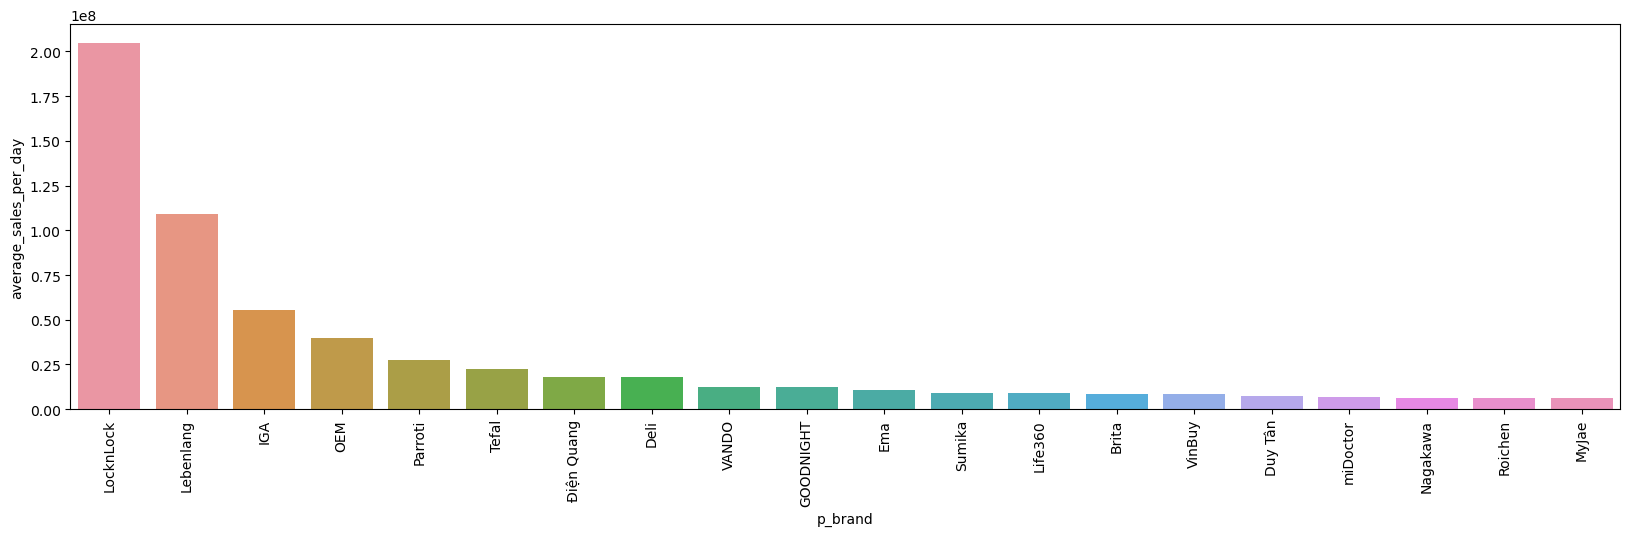

In [5]:
plt.figure(figsize=(20, 5))
sns.barplot(x=df_brand_revenue.index[:20], y=df_brand_revenue['average_sales_per_day'][:20])
plt.xticks(rotation=90)
plt.show()

&#9889; <font color="yellow"><b>Conclusion:</b></font> From that we can see, <font color="orange">locknlock</font> topped the sales table and doubled that of the 2nd brand. And the 2nd brand is twice the 3rd brand. Later on, the difference between brands is not too big. Partly due to the limited number of brands' products, and partly because <font color="orange">locknlock</font> advertises a lot, it is quite famous in the market.